# us-accident-analysis 

Exploratory Data Analysis (EDA) applies various statistical methods to a data set and observes the data's main characteristics. This often includes data visualization techniques to picturise the numbers found during exploration.

This project analyses accident data collected from 49 states of the United States of America over the period between February 2016 and December 2020. The set is sourced from Kaggle. It has a total of 29,06,610 rows and 47 columns; inclusive of but not limited to variables such as ‘State’, ‘City’, ‘Start_Time’, ‘Temperature(F)’, ‘Weather_Condition’ etc.

While it is not possible to predict accidents, it is quite useful to analyze the conditions under which they happen. It will be helpful to have an overview of the conditions that are controllable so that the number of mishaps can be reduced.


This dataset does not contain any New York city accidents data.

# Download the Data
The first step to any data project is to download the data. In this case, the CSV file is directly accessed from Kaggle with the following code-

In [ ]:
!pip install opendatasets --upgrade -q

In [ ]:
import opendatasets as od

download_url = "https://www.kaggle.com/sobhanmoosavi/us-accidents"

od.download(download_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: saisubhashmooli
Your Kaggle Key: ··········


100%|██████████| 269M/269M [00:01<00:00, 150MB/s]

To make file access easier, let’s add the file name as

In [ ]:
data_filename = "./us-accidents/US_Accidents_Dec21_updated.csv"

## Data Preparation and Cleaning

1. Load the dataset using of Pandas
2. Look at some information about data & cloumns
3. Fix any missig or incorrect values 

In [ ]:
import pandas as pd

df = pd.read_csv(data_filename)
df.head()

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,3,2016-02-08 00:37:08,2016-02-08 06:37:08,40.108910,-83.092860,40.112060,-83.031870,3.230,Between Sawmill Rd/Exit 20 and OH-315/Olentang...,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,2,2016-02-08 05:56:20,2016-02-08 11:56:20,39.865420,-84.062800,39.865010,-84.048730,0.747,At OH-4/OH-235/Exit 41 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Night
2,A-3,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.102660,-84.524680,39.102090,-84.523960,0.055,At I-71/US-50/Exit 1 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Day
3,A-4,2,2016-02-08 06:51:45,2016-02-08 12:51:45,41.062130,-81.537840,41.062170,-81.535470,0.123,At Dart Ave/Exit 21 - Accident.,...,False,False,False,False,False,False,Night,Night,Day,Day
4,A-5,3,2016-02-08 07:53:43,2016-02-08 13:53:43,39.172393,-84.492792,39.170476,-84.501798,0.500,At Mitchell Ave/Exit 6 - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day


In [ ]:
df.shape

(2845342, 47)

The data has about 2.9 million rows and 47 columns. Let us see what the columns have for us to analyze-

In [ ]:
df.columns

Index(['ID', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng',
       'End_Lat', 'End_Lng', 'Distance(mi)', 'Description', 'Number', 'Street',
       'Side', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

Next, we need an overview of the data types for each column-

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2845342 entries, 0 to 2845341
Data columns (total 47 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Severity               int64  
 2   Start_Time             object 
 3   End_Time               object 
 4   Start_Lat              float64
 5   Start_Lng              float64
 6   End_Lat                float64
 7   End_Lng                float64
 8   Distance(mi)           float64
 9   Description            object 
 10  Number                 float64
 11  Street                 object 
 12  Side                   object 
 13  City                   object 
 14  County                 object 
 15  State                  object 
 16  Zipcode                object 
 17  Country                object 
 18  Timezone               object 
 19  Airport_Code           object 
 20  Weather_Timestamp      object 
 21  Temperature(F)         float64
 22  Wind_Chill(F)     

The above list ends by saying that there are 13 boolean type, 13 float type, 1 integer, and 20 object type of data.

Moving on to summary statistics of the columns-

In [ ]:
df.describe()

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Number,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,2.845342e+06,2.845342e+06,2.845342e+06,2.845342e+06,2.845342e+06,2.845342e+06,1.101431e+06,2.776068e+06,2.375699e+06,2.772250e+06,2.786142e+06,2.774796e+06,2.687398e+06,2.295884e+06
mean,2.137572e+00,3.624520e+01,-9.711463e+01,3.624532e+01,-9.711439e+01,7.026779e-01,8.089408e+03,6.179356e+01,5.965823e+01,6.436545e+01,2.947234e+01,9.099391e+00,7.395044e+00,7.016940e-03
std,4.787216e-01,5.363797e+00,1.831782e+01,5.363873e+00,1.831763e+01,1.560361e+00,1.836009e+04,1.862263e+01,2.116097e+01,2.287457e+01,1.045286e+00,2.717546e+00,5.527454e+00,9.348831e-02
min,1.000000e+00,2.456603e+01,-1.245481e+02,2.456601e+01,-1.245457e+02,0.000000e+00,0.000000e+00,-8.900000e+01,-8.900000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.000000e+00,3.344517e+01,-1.180331e+02,3.344628e+01,-1.180333e+02,5.200000e-02,1.270000e+03,5.000000e+01,4.600000e+01,4.800000e+01,2.931000e+01,1.000000e+01,3.500000e+00,0.000000e+00
50%,2.000000e+00,3.609861e+01,-9.241808e+01,3.609799e+01,-9.241772e+01,2.440000e-01,4.007000e+03,6.400000e+01,6.300000e+01,6.700000e+01,2.982000e+01,1.000000e+01,7.000000e+00,0.000000e+00
75%,2.000000e+00,4.016024e+01,-8.037243e+01,4.016105e+01,-8.037338e+01,7.640000e-01,9.567000e+03,7.600000e+01,7.600000e+01,8.300000e+01,3.001000e+01,1.000000e+01,1.000000e+01,0.000000e+00
max,4.000000e+00,4.900058e+01,-6.711317e+01,4.907500e+01,-6.710924e+01,1.551860e+02,9.999997e+06,1.960000e+02,1.960000e+02,1.000000e+02,5.890000e+01,1.400000e+02,1.087000e+03,2.400000e+01


**The data has 14 numeric columns while the rest are categorical variables.**

The third and final step in the data preparation stage is to look for missing values. Missing values under different columns can add an unwanted skewness to their distribution, making it complicated to analyze. It is always a good practice to filter such values at the very beginning.

In [ ]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

numeric_df = df.select_dtypes(include=numerics)
len(numeric_df.columns)

14

In [ ]:
df.isna()

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2845337,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2845338,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2845339,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2845340,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


Running the df.isna() converted everything into a boolean. It returned False for columns that do not have missing values; True otherwise.
We need the total numbers for each column in descending order-

Percentage of missing values per column

In [ ]:
missing_percentages = df.isna().sum().sort_values(ascending=False)
missing_percentages

Number                   1743911
Precipitation(in)         549458
Wind_Chill(F)             469643
Wind_Speed(mph)           157944
Wind_Direction             73775
Humidity(%)                73092
Weather_Condition          70636
Visibility(mi)             70546
Temperature(F)             69274
Pressure(in)               59200
Weather_Timestamp          50736
Airport_Code                9549
Timezone                    3659
Nautical_Twilight           2867
Civil_Twilight              2867
Sunrise_Sunset              2867
Astronomical_Twilight       2867
Zipcode                     1319
City                         137
Street                         2
Country                        0
Junction                       0
Start_Time                     0
End_Time                       0
Start_Lat                      0
Turning_Loop                   0
Traffic_Signal                 0
Traffic_Calming                0
Stop                           0
Station                        0
Roundabout

In [ ]:
type(missing_percentages)

pandas.core.series.Series

*The columns ‘Number’, ‘Precipitation(in)’ and ‘Wind_Chill(F)’ have the most missing values (40–60% of the data). It is wise to either remove the columns altogether or exclude them from the ensuing analysis.*

Let us now see what the above numbers would look like visually. Plotting a horizontal bar chart as-

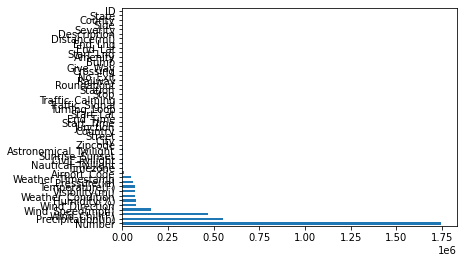

In [ ]:
missing_percentages.plot(kind='barh')

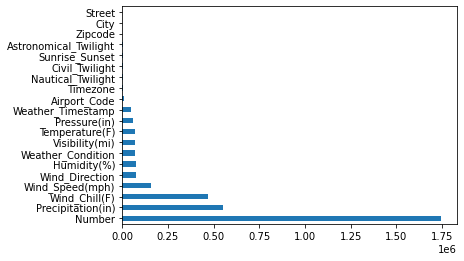

In [ ]:
missing_percentages[missing_percentages != 0].plot(kind='barh')

Remove columns that you don't want to use

## Exploratory Analysis and Visualization

Once the data is cleaned and prepped for analysis, we take some of the columns and apply statistical methods to see the underlying picture come to the surface. The following columns have been analyzed in this project-

- State
- City
- Start Time
- Temperature
- Weather Condition
- Visibility
- Crossing
- Traffic Signal
- Bump
- Start Latitude & Longitude


## State
The column lists down the name of the US state found in the address of the accident. We want to see the top 10 states by the number of accidents.

In [ ]:
df.columns

Index(['ID', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng',
       'End_Lat', 'End_Lng', 'Distance(mi)', 'Description', 'Number', 'Street',
       'Side', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

In [ ]:
df.State

Let’s look at the top ten states by the number of accidents. To do this, we need the absolute number of accidents against each state.

In [ ]:
states_by_accident = df.State.value_counts()
states_by_accident[:10]

Clearly, a significant number of accidents have happened in California, Florida, Texas, and New York. Next, we plot a horizontal bar chart for the top ten states-

In [ ]:
states_by_accidents[:10].plot(kind = 'barh')

## City

The column lists the name of the city in the address record. Let us now check how many cities of the top ten states above feature in the top 30 cities by accidents.

In [ ]:
df.City

0               Dublin
1               Dayton
2           Cincinnati
3                Akron
4           Cincinnati
              ...     
2845337      Riverside
2845338      San Diego
2845339         Orange
2845340    Culver City
2845341       Highland
Name: City, Length: 2845342, dtype: object

In [ ]:
cities = df.City.unique()
len(cities)

11682

The total number of cities is 11,682. Running similar commands applied to the ‘State’ column, we can get the cities by the number of accidents as-

In [ ]:
cities_by_accident = df.City.value_counts()
cities_by_accident

Miami                           106966
Los Angeles                      68956
Orlando                          54691
Dallas                           41979
Houston                          39448
                                 ...  
Ridgedale                            1
Sekiu                                1
Wooldridge                           1
Bullock                              1
American Fork-Pleasant Grove         1
Name: City, Length: 11681, dtype: int64

In [ ]:
cities_by_accident[:20]

Miami           106966
Los Angeles      68956
Orlando          54691
Dallas           41979
Houston          39448
Charlotte        33152
Sacramento       32559
San Diego        26627
Raleigh          22840
Minneapolis      22768
Portland         20944
Nashville        20267
Austin           18301
Baton Rouge      18182
Phoenix          17143
Saint Paul       16869
New Orleans      16251
Atlanta          15622
Jacksonville     14967
Richmond         14349
Name: City, dtype: int64

In [ ]:
'NY' in df.State

False

The top cities include Miami,Los Angeles, Orelando, Dallas, Houston, etc. Let’s visualize the top 20 cities and see how many belong to the top ten states.

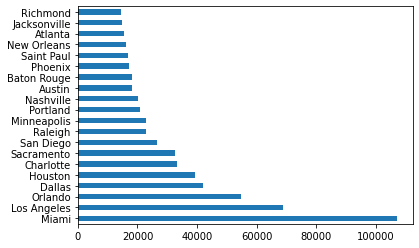

In [ ]:
cities_by_accident[:20].plot(kind='barh')

There is quite a lot of presence of cities from California (LA, Sacramento, San Diego, Riverside, Jacksonville), followed by Texas (Houston, Dallas, Austin), Florida (Miami, Orlando), and North Carolina (Charlotte, Raleigh). This is in tandem with the top three states: California, Florida, Texas, and North Carolina.

How would the distribution of cities by the number of accidents look like?

In [ ]:
import seaborn as sns
sns.set_style('darkgrid')

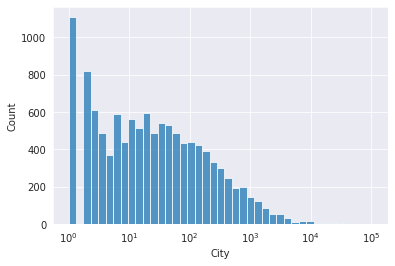

In [ ]:
sns.histplot(cities_by_accident, log_scale=True)

Over 1200 cities have reported only one accident during the entire period. This could either be very good news or it could be a result of missing data. Let’s break cities by accidents into two groups and see their respective distributions-


In [ ]:
cities_by_accident[cities_by_accident == 1]

Carney                          1
Waverly Hall                    1
Center Sandwich                 1
Glen Flora                      1
Sulphur Springs                 1
                               ..
Ridgedale                       1
Sekiu                           1
Wooldridge                      1
Bullock                         1
American Fork-Pleasant Grove    1
Name: City, Length: 1110, dtype: int64

- High accident cities where the number of accidents is greater and equal to 1000

- Low accident cities where the number is less than 1000.

In [ ]:
high_accident_cities = cities_by_accident[cities_by_accident >= 1000]
low_accident_cities = cities_by_accident[cities_by_accident < 1000]

What is the percentage of high accident cities?

In [ ]:
len(high_accident_cities) / len(cities)

0.04245848313644924

4.35% of the total number of cities have an accident number greater than 1000.

The distribution of high accident cities look as-

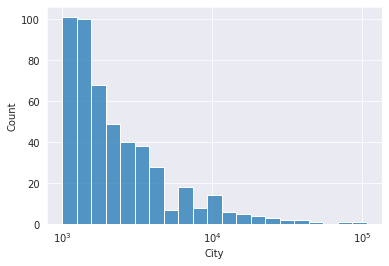

In [ ]:
sns.histplot(high_accident_cities, log_scale=True);

Less than 150 cities (out of 11,682) reported more than 1000 accidents during the period between February 2016 and December 2020. Similarly, the cities with the low number of accidents are picturized as-

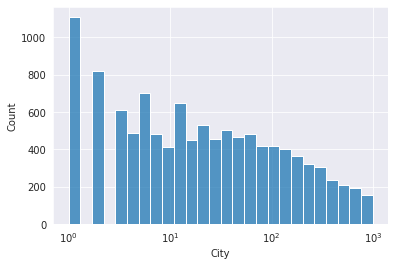

In [ ]:
sns.histplot(low_accident_cities, log_scale=True);

- Over 1200 cities have had just one accident in 5years- needs further investigation.
- The majority of them have witnessed between 10–100 accidents during the period.
- Accidents by cities follow an exponentially decreasing distribution.

## Start Time

This column records the start time of the accident in the local time zone.

In [ ]:
df.Start_Time

0          2016-02-08 00:37:08
1          2016-02-08 05:56:20
2          2016-02-08 06:15:39
3          2016-02-08 06:51:45
4          2016-02-08 07:53:43
                  ...         
2845337    2019-08-23 18:03:25
2845338    2019-08-23 19:11:30
2845339    2019-08-23 19:00:21
2845340    2019-08-23 19:00:21
2845341    2019-08-23 18:52:06
Name: Start_Time, Length: 2845342, dtype: object

Convert the string to Timestamp format using the following-

In [ ]:
df.Start_Time = pd.to_datetime(df.Start_Time)
df.Start_Time[0]  

Timestamp('2016-02-08 00:37:08')

We want to know what time of the day witnesses more accidents. To do this, we pull the hour from the timestamp format above-

In [ ]:
#extract hour from timestamp
df.Start_Time.dt.hour

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


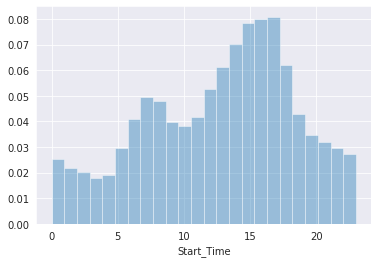

In [ ]:
sns.distplot(df.Start_Time.dt.hour, bins=24, kde=False, norm_hist=True)

- There are two peaks of time- one in the morning in between 6 am to 9 am and another between 1 pm and 6 pm. This is consistent with the assumption that rush hours in the morning and evening could lead to more accidents.

- This is consistent with the assumption that rush hours in the morning and evening could lead to more accidents.
Does this trend apply on weekends too? Let us do a Monday and Sunday comparison.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


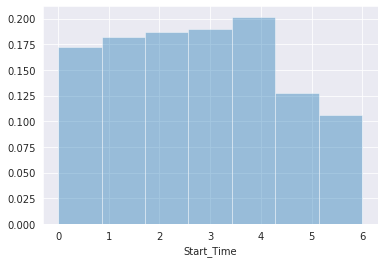

In [ ]:
sns.distplot(df.Start_Time.dt.dayofweek, bins=7, kde=False, norm_hist=True)

Is the distribution of accidents by hour the same on weekends as on weekdays

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


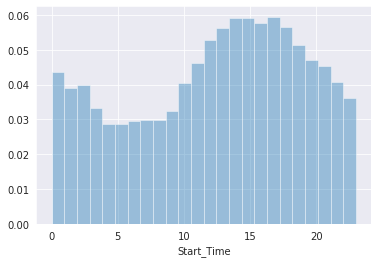

In [ ]:
sundays_start_time = df.Start_Time[df.Start_Time.dt.dayofweek == 6]
sns.distplot(sundays_start_time.dt.hour, bins=24, kde=False, norm_hist=True);

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


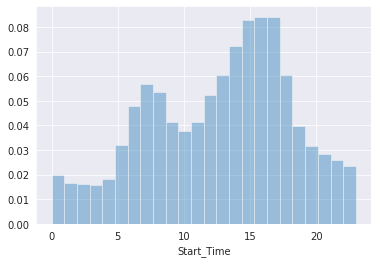

In [ ]:
mondays_start_time = df.Start_Time[df.Start_Time.dt.dayofweek == 0]
sns.distplot(mondays_start_time.dt.hour, bins=24, kde=False, norm_hist=True);

While Monday follows the general 24-hour pattern- two peaks coinciding with work rush; the distribution for Sunday sees a peak between 10 am and 2 pm. This could be due to people going out for leisurely activities on Sundays.

If we plot for the monthly distribution of accidents, there seems to be a steady upward curve from the second half of the year, as shown below-

On Sundays, the peak occurs between 12 pm  to 5 pm

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


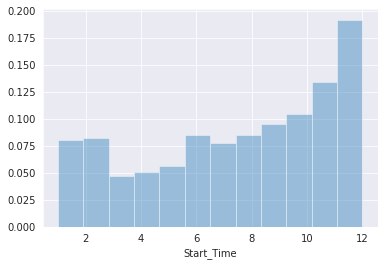

In [ ]:
# df_2021 = df[df.Start_Time.dt.year == 2021]
# df_2021_Bing = df_2021[df_2021.Source == 'Bing']
sns.distplot(df.Start_Time.dt.month, bins=12, kde=False, norm_hist=True);

- This could possibly be due to summer break and then the new school term around August-September. But does this hold for all the years under consideration? Let’s look at 2016-

In [ ]:
#2016
df_2016 = df[df.Start_Time.dt.year == 2016]
sns.distplot(df_2016.Start_Time.dt.month, bins = 12, kde=False, norm_hist=True)

Clearly, there is data missing for the month of January (data was collected from February 2016) and July.
What about the year 2019?

In [ ]:
df_2019 = df[df.Start_Time.dt.year == 2019]
sns.distplot(df_2019.Start_Time.dt.month, bins = 12, kde=False, norm_hist=True)

2019 does not show a consistent increase in accidents over the months. So, the overall picture might be misleading due to the significant numbers missing. It could also be attributed to data mismatch if the sources of the collection are varied. This would need further investigation.

## Temperature
This column recorded temperature at the time of the accident in degrees Fahrenheit.

In [ ]:
df['Temperature(F)'].value_counts()

Let’s visualize the above in a boxplot-

In [ ]:
sns.boxenplot(df['Temperature(F)'])

So, a chunk of the accidents happens to be in areas experiencing temperatures in the range of (50–60) degrees Fahrenheit. Most accidents occur in colder weather or regions.

## Weather Condition
This column has the description of the weather condition at the time of the accident, such as, “Fair”, “Cloudy”, “Clear” etc.

Let us build a word cloud to see which word is the most frequent.

In [ ]:
df.Weather_Condition.value_counts()

The following is then executed to plot the word cloud-

In [ ]:
from wordcloud import WordCloud

data = df['Weather_Condition'].value_counts().to_dict()
wc = WordCloud(width = 900, height = 800,
background_color ='white',
min_font_size = 10).generate_from_frequencies(data)
plt.imshow(wc)
plt.axis('off')
plt.show()

The most frequently used word is “Fair”, followed by “Clear” and “Mostly Cloudy”. Now, the question arises that how did most of the recorded accidents occur under such weather conditions?

## Visibility
This records visibility at the time of the accident in miles. The average comes at 9.12miles. Let’s look at its distribution-

In [ ]:
sns.histplot(df['Visibility(mi)'].value_counts(), bins= 5, kde=True, log_scale=True)

The majority of accidents happened when the visibility was between 1 to 10 miles. Typically, 10-mile visibility is used as a rule of thumb as a person should be able “to see and identify” in the daytime “a prominent dark object against the sky at the horizon” and at night “a known, preferably unfocused, moderately intense light source” that’s 10 miles away. There’s no definition of how tall the “prominent dark object” or the “light source” can be.

On the surface of things, visibility is not a strong enough reason for the accidents.

## Crossing
The column records the presence of a crossing nearby at the point of the accident. “True” and “False” values is best visualized in a pie-chart-

In [ ]:
df['Crossing'].value_counts().plot(kind= 'pie')

The accidents mostly happened away from a crossing. This brings to the query of proper signaling systems in these areas.

## Traffic SIgnal
A binary column indicating the presence of a traffic signal nearby the spot of the accident.

In [ ]:
df['Traffic_Signal'].value_counts().plot(kind='pie')

Clearly, poor traffic management is a cause for the chunk of the accidents.

## Bump
A binary column indicating the presence of a speed bump nearby the spot of the accident.

In [ ]:
df['Bump'].value_counts().plot(kind='pie')

Speed control mechanisms are inadequate in the recorded accidents.

## Start Latitude & Longitude

In [ ]:
df.Start_Lat

0          40.108910
1          39.865420
2          39.102660
3          41.062130
4          39.172393
             ...    
2845337    34.002480
2845338    32.766960
2845339    33.775450
2845340    33.992460
2845341    34.133930
Name: Start_Lat, Length: 2845342, dtype: float64

In [ ]:
df.Start_Lng

0          -83.092860
1          -84.062800
2          -84.524680
3          -81.537840
4          -84.492792
              ...    
2845337   -117.379360
2845338   -117.148060
2845339   -117.847790
2845340   -118.403020
2845341   -117.230920
Name: Start_Lng, Length: 2845342, dtype: float64

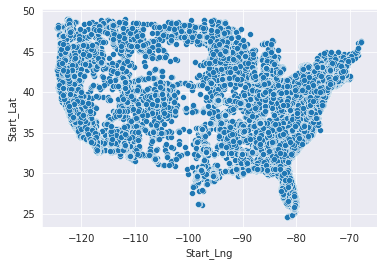

In [ ]:
sample_df = df.sample(int(0.1 * len(df)))
sns.scatterplot(x=sample_df.Start_Lng, y =sample_df.Start_Lat)

In [ ]:
import folium
from folium.plugins import HeatMap

In [ ]:
lat, lon = df.Start_Lat[0], df.Start_Lng[0]
lat, lon 

(40.10891, -83.09286)

In [ ]:
for x in df[['Start_Lat', 'Start_Lng']].sample(100).iteritems():
  print(x[1])

2267076    47.332210
1736352    30.111154
221393     26.039210
227341     36.051480
2207070    35.670970
             ...    
145455     39.098800
2495767    34.000665
1854999    32.845982
1765362    36.413778
1687840    26.017109
Name: Start_Lat, Length: 100, dtype: float64
2267076   -122.878710
1736352    -97.806783
221393     -80.163680
227341     -86.669757
2207070    -78.706310
              ...    
145455     -94.609640
2495767   -117.844960
1854999   -117.197080
1765362   -119.099012
1687840    -80.167415
Name: Start_Lng, Length: 100, dtype: float64


In [ ]:
sample_df = df.sample(int(0.01 * len(df)))
lat_lon_pairs = zip(list(sample_df.Start_Lat), list(sample_df.Start_Lng))

In [ ]:
map = folium.Map()
HeatMap(lat_lon_pairs).add_to(map)
map

## Ask & answer questions

1. Are there more accidents in warmer or colder areas?
2. Which 5 states have the highest number of accidents? How about per capita?
3. Does New York shown up in the data? If yes, why is the count lower if this is most populated city?
4. Among the top 100 cities in number of accidents, which states do they belong to most frequently?
5. What time of the day are accidents most of frequent in?
6. Which days of the week have the most accidents?
7. Which month have the most accidents?
8. What is the trend of accidents year over year (decreasing/increasing)?
9. When is accidents per unit of traffic  the highest?

## Summary and Conclusion

Insights:
1. The dataset does not have New York data.
The project analyzed various parameters on accident occurrence and the following insights have been found upon drilling the above parameters:
2. The top 5 states by accidents include populous ones like Los Angeles, Houston, and Florida.
3. Less than 5% (~ 4.35%) of cities have more than 1000 accidents in the period between February 2016 and December 2020.

4. Over 1200 cities have had just one accident in 4yeaars- needs further investigation.
5. The majority of them have witnessed between 10–100 accidents during the period.
6. Accidents by cities follow an exponentially decreasing distribution.
7. The hypothesis that weekdays see more accidents during morning and evening rush hours is corroborated by the data. Weekends have the peak during the afternoon.
8. The year-wise analysis seems to show missing data about certain months. So nothing much can be conclusively said about the overall increasing trend in the latter half of the year.
9. The weather conditions seem to be “Fair”, “Clear” and “Mostly Cloudy” in most cases. The assumption of a 10mile visibility also doesn’t conclusively explain the accidents due to these factors.
10. Most accidents happened away from the main crossing where there was inadequate or absence of traffic management infrastructures like traffic signaling systems and speed bumps.

# **conclusion**:
 it can be said that while the percentage of accidents is low for most cities, it is important to hammer the point that this analysis points to the following-

The majority of such accidents seemed to have happened due to the absence of proper traffic management mechanisms like traffic signals and bumps- particularly in areas away from the main crossings.



#Future Scope
Analyze year-on-year trends of accidents.
Explore per-capita accident figures by adding a state and city-wise population data set.
The question of missing data in certain months could be analyzed if there is some data available on the source/s of this one.